In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns

In [10]:
ww_df = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx', index_col=None, header=0)
ww_df.rename(columns={'https://www.ecdc.europa.eu/en/novel-coronavirus-china/sources-updated': 'date',}, inplace=True)
ww_df.head()
ww_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12801 entries, 0 to 12800
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  12801 non-null  datetime64[ns]
 1   day                      12801 non-null  int64         
 2   month                    12801 non-null  int64         
 3   year                     12801 non-null  int64         
 4   cases                    12801 non-null  int64         
 5   deaths                   12801 non-null  int64         
 6   countriesAndTerritories  12801 non-null  object        
 7   geoId                    12760 non-null  object        
 8   countryterritoryCode     12664 non-null  object        
 9   popData2018              12694 non-null  float64       
 10  continentExp             12801 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 1.1+ MB


In [11]:
ww_df = ww_df.drop(ww_df.columns[[1, 2, 3, 7, 8, 10]], axis='columns')
ww_df['popData2018'] = ww_df['popData2018'].fillna(0).astype(np.int64)
ww_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12801 entries, 0 to 12800
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  12801 non-null  datetime64[ns]
 1   cases                    12801 non-null  int64         
 2   deaths                   12801 non-null  int64         
 3   countriesAndTerritories  12801 non-null  object        
 4   popData2018              12801 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 500.2+ KB


In [12]:
france = ww_df[ww_df['countriesAndTerritories']=="France"]
germany = ww_df[ww_df['countriesAndTerritories']=="Germany"]
arte_df = pd.merge(france, germany, on='dateRep')
arte_df.info()
arte_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 115
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   dateRep                    116 non-null    datetime64[ns]
 1   cases_x                    116 non-null    int64         
 2   deaths_x                   116 non-null    int64         
 3   countriesAndTerritories_x  116 non-null    object        
 4   popData2018_x              116 non-null    int64         
 5   cases_y                    116 non-null    int64         
 6   deaths_y                   116 non-null    int64         
 7   countriesAndTerritories_y  116 non-null    object        
 8   popData2018_y              116 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 9.1+ KB


dateRep  cases_x  deaths_x countriesAndTerritories_x  popData2018_x  \
0 2020-04-24     1653       516                    France       66987244   
1 2020-04-23     1827       544                    France       66987244   
2 2020-04-22     2667       531                    France       66987244   
3 2020-04-21     2051       547                    France       66987244   
4 2020-04-20      785       395                    France       66987244   

   cases_y  deaths_y countriesAndTerritories_y  popData2018_y  
0     2337       227                   Germany       82927922  
1     2352       215                   Germany       82927922  
2     2237       281                   Germany       82927922  
3     1785       194                   Germany       82927922  
4     1775       110                   Germany       82927922

In [13]:
arte_df['france_cases_ratio'] = arte_df['cases_x']/arte_df['popData2018_x']*100
arte_df['germany_cases_ratio'] = arte_df['cases_y']/arte_df['popData2018_y']*100
france_cases_normalized_mean = arte_df["france_cases_ratio"].mean()
germany_cases_normalized_mean = arte_df["germany_cases_ratio"].mean()
france_cases_normalized_sd = arte_df["france_cases_ratio"].std()
germany_cases_normalized_sd = arte_df["germany_cases_ratio"].std()
france_cases_normalized_median = arte_df["france_cases_ratio"].median()
germany_cases_normalized_median = arte_df["germany_cases_ratio"].median()
print('French cases mean normalized:', france_cases_normalized_mean, 'std:', france_cases_normalized_sd, 'median:', france_cases_normalized_median)
print('Germany cases mean normalized:', germany_cases_normalized_mean, 'std:', germany_cases_normalized_sd, 'median:', germany_cases_normalized_median)

French cases mean normalized: 0.0015546449307624122 std: 0.002431837026117588 median: 5.97128611530876e-06
Germany cases mean normalized: 0.001563291520091138 std: 0.002374468198733401 median: 4.220532621087503e-06


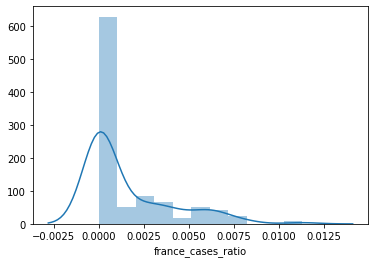

In [6]:
france_hist = sns.distplot(arte_df['france_cases_ratio'])

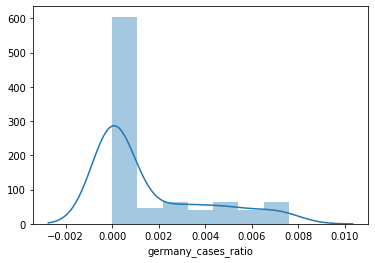

In [7]:
germany_hist = sns.distplot(arte_df['germany_cases_ratio'])

In [8]:
u_statistic, pVal = stats.mannwhitneyu(arte_df['france_cases_ratio'], arte_df['germany_cases_ratio'])
print ('P value:', pVal)

P value: 0.39178518610900553
